# Simulating Chuck a Luck

## "Pay a Buck and Chuck-a-Luck" 

[Chuck-a-Luck](https://en.wikipedia.org/wiki/Chuck-a-luck) is a game of chance often associated with charity fundraisers or street gambling rather than casinos. 

To play, the House says, 
- Pay $1, pick a number and roll 3 dice. If any of those dice come up, you'll win 1, 2, or 3 dollars

> "It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2". 

You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:
- The player pays $1 to play and picks a number.
- The House rolls 3 dice at once.

- Payouts:
  - 3 if all three dice match the chosen number
  - 2 if exactly two dice match the chosen number
  - 1 is exactly one of the dice matches the chosen number
  - If none of the dice match the player's chosen number, then the House keeps the $1.

Exercises:
- If you play 1,000,000 games in a row, what are your winnings/losses?
- Chart out a histogram of all the outcomes of those 1,000,000 games
- Is this really a fair game of 1/6 + 1/6 + 1/6 odds?
- If you were to extrapolate the expected winnings per game, what would that number approach per game? 


In [1]:
# use numpy to generate our random numbers
# get data from numpy into pandas for final analysis

In [2]:
import numpy as np
import pandas as pd

In [3]:
# generate a random number between 1 and 6
# how can we roll that 1,000,000

In [4]:
# np.random.choice([1,2,3,4,5,6], (1_000_000, 3))
# np.random.choice([1,2,3,4,5,6], size=(100_000_000, 3))
# np.random.choice(range(1,7), size=(1000000)

In [5]:
rolls = np.random.choice(range(1,6), size=(1_000_000,3))
rolls[0]

array([2, 5, 2])

In [6]:
die1 = np.random.choice([1, 2, 3, 4, 5, 6], 1_000_000)
die2 = np.random.choice([1, 2, 3, 4, 5, 6], 1_000_000)
die3 = np.random.choice([1, 2, 3, 4, 5, 6], 1_000_000)

In [7]:
die1[0]

2

In [8]:
die2[0]

6

In [9]:
die3[0]

2

In [10]:
# how we would loop through all these
# for i in len(die1):
#     die1[i]
#     die2[i]
#     die3[i]
# but we're cooler than base python

In [11]:
lucky_number = 5

In [12]:
rolls = np.random.choice([1,2,3,4,5,6], (1_000_000, 3))

In [13]:
# find a way to represent the trial itself in python code
# trial is "one event" of a probability
rolls

array([[2, 1, 5],
       [5, 4, 5],
       [1, 6, 1],
       ...,
       [2, 3, 5],
       [6, 6, 1],
       [4, 4, 6]])

In [14]:
rolls = pd.DataFrame(rolls)

In [15]:
rolls.head()

,0,1,2
0,2,1,5
1,5,4,5
2,1,6,1
3,2,3,2
4,2,6,1


In [16]:
# rolls.columnName
# rolls["columnName"]

In [17]:
# let's rename the columns as a recipe for clarity
# one approach
# rolls["die1"] = rolls[0]
# rolls["die2"] = rolls[1]
# rolls["die3"] = rolls[2]
# rolls = rolls[["die1", "die2", "die3"]]
# rolls.head()

In [18]:
# rolls = rolls.rename(columns={ 0: "first", 1: "second", 2: "third"})

In [19]:
rolls.columns = ["first", "second", "third"]
rolls.head()

,first,second,third
0,2,1,5
1,5,4,5
2,1,6,1
3,2,3,2
4,2,6,1


In [20]:
lucky_number

5

In [21]:
# reminder of the rules
# you get $1 if only one dice matches your lucky number
# you get $2 if exactly two dice match your number
# you get $3 if you get all 3
# otherwise, you lose $1 

# outline the game - what happens when
# outline the actual game play
# once you crack the first surface of the problem, the rest flows

In [22]:
# what are some nouns in the outline of our process? 
# what are some of the verbs in the process of the game?

# number of matches
# rolls
# outcome
# pay-in or cost
# payout

# The clarity of your spoken language around the problem contributes to the clarity of your code


In [23]:
rolls.head()

,first,second,third
0,2,1,5
1,5,4,5
2,1,6,1
3,2,3,2
4,2,6,1


In [24]:
# we may need to focus on the axis here..
# def get_matches(row):
#     matches = 0
#     if(row[0] == lucky_number):
#         matches += 1
#     if(row[1] == lucky_number):
#         matches += 1
#     if(row[2] == lucky_number):
#         matches += 1
#     return matches

In [25]:
# get_matches([5, 5, 5])

In [26]:
# commented out b/c we have an easier solution later that is also less computationally intensive
# rolls["number_of_matches"] = rolls.apply(get_matches, axis=1)

In [27]:
# Let's simplify :)

In [28]:
rolls["first_matches"] = rolls["first"] == lucky_number
rolls["second_matches"] = rolls["second"] == lucky_number
rolls["third_matches"] = rolls["third"] == lucky_number

In [29]:
# treat the booleans as numbers
rolls = rolls.astype(int)
rolls

,first,second,third,first_matches,second_matches,third_matches
0,2,1,5,0,0,1
1,5,4,5,1,0,1
2,1,6,1,0,0,0
3,2,3,2,0,0,0
4,2,6,1,0,0,0
...,...,...,...,...,...,...
999995,5,6,4,1,0,0
999996,1,2,2,0,0,0
999997,2,3,5,0,0,1
999998,6,6,1,0,0,0


In [30]:
rolls["number_of_matches"] = rolls["first_matches"] + rolls["second_matches"] + rolls["third_matches"]

In [31]:
rolls.head(10)

,first,second,third,first_matches,second_matches,third_matches,number_of_matches
0,2,1,5,0,0,1,1
1,5,4,5,1,0,1,2
2,1,6,1,0,0,0,0
3,2,3,2,0,0,0,0
4,2,6,1,0,0,0,0
5,6,4,4,0,0,0,0
6,4,1,5,0,0,1,1
7,3,1,6,0,0,0,0
8,1,4,3,0,0,0,0
9,1,2,4,0,0,0,0


In [36]:
# what's the next step? where do we go from herE?
# go back to the original game setup
# calculate winnings
# 0 matchs means -1 payout
# 1 match means we win 0 because we paid 1 to play
# 2 matches means we win $1 because we paid $1 and received $2
# 3 matches means we win $3 because we paid $1 to receive $3
rolls["cost_to_play"] = 1

In [37]:
rolls["winnings"] = rolls.number_of_matches - rolls.cost_to_play

In [38]:
rolls

,first,second,third,first_matches,second_matches,third_matches,number_of_matches,cost_to_play,winnings
0,2,1,5,0,0,1,1,1,0
1,5,4,5,1,0,1,2,1,1
2,1,6,1,0,0,0,0,1,-1
3,2,3,2,0,0,0,0,1,-1
4,2,6,1,0,0,0,0,1,-1
...,...,...,...,...,...,...,...,...,...
999995,5,6,4,1,0,0,1,1,0
999996,1,2,2,0,0,0,0,1,-1
999997,2,3,5,0,0,1,1,1,0
999998,6,6,1,0,0,0,0,1,-1


In [39]:
# sum of all winning
rolls.winnings.sum()

-499457

In [41]:
# average winnings per play
rolls.winnings.mean()

-0.499457

In [43]:
# is there a way to break this down based on the probability
rolls["flat_or_up"] = rolls.winnings >= 0

In [48]:
rolls["loss"] = ~rolls.flat_or_up

In [50]:
rolls.loss.mean()

0.578217

In [51]:
rolls.flat_or_up.mean()

0.421783

In [52]:
rolls["up"] = rolls.winnings >= 1

In [53]:
rolls.up.mean()

0.07413

In [54]:
rolls.winnings.value_counts(normalize=True)

-1    0.578217
 0    0.347653
 1    0.069500
 2    0.004630
Name: winnings, dtype: float64

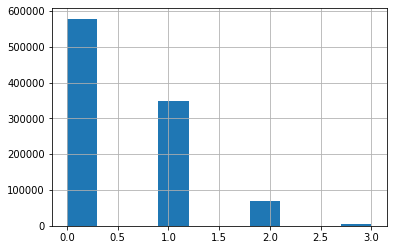

In [57]:
rolls.number_of_matches.hist()